<a href="https://colab.research.google.com/github/ibritics/Python_Regression_Analysis_YT/blob/main/Python_Interview_Questions_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python Interview Questions for Data Analysts and Scientists
Thank you very much for choosing this course. I appreciate any feedback that you might leave to improve this courses quality. It's my first course and some details might lack, please be patient with it and communicate me about the defect of the course. I will try to fix it as soon as possible.

## Setting up colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #These two commands are needed for connecting colab to the drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# !pip install pandas

In [ ]:
# '/content/drive/MyDrive/Udemy Materials/Datasets/Auto.csv'
auto = pd.read_csv('/content/drive/MyDrive/Udemy Materials/Datasets/Auto.csv',index_col= 'name', na_values = "?")

In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


##  Categorical variables and how to include them into the model

In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
auto.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          350
acceleration     95
year             13
origin            3
dtype: int64

In [ ]:
# !pip install scikit-learn #sklearn

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(auto[['origin']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
column_names =['americas','europe', 'asia']

In [ ]:
auto[column_names]= encoded_data

In [ ]:
auto= auto.drop('origin', axis=1)

In [ ]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,americas,europe,asia
name,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1.0,0.0,0.0
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1.0,0.0,0.0
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1.0,0.0,0.0
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1.0,0.0,0.0
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1.0,0.0,0.0
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,0.0,1.0,0.0
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1.0,0.0,0.0


## Missing values and how to handle them?

In [ ]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
americas        0
europe          0
asia            0
dtype: int64

In [ ]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'americas', 'europe', 'asia'],
      dtype='object')

In [ ]:
correlation_matrix = auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'americas', 'europe', 'asia']].corr()

In [ ]:
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,americas,europe,asia
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,-0.568495,0.259017,0.442232
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,0.607038,-0.354280,-0.398044
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,0.652830,-0.374540,-0.434242
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.489625,-0.284948,-0.321936
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,0.598705,-0.298836,-0.440862
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,-0.255521,0.207451,0.111876
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,-0.143628,-0.022683,0.195845
americas,-0.568495,0.607038,0.652830,0.489625,0.598705,-0.255521,-0.143628,1.000000,-0.596909,-0.643032
europe,0.259017,-0.354280,-0.374540,-0.284948,-0.298836,0.207451,-0.022683,-0.596909,1.000000,-0.230608
asia,0.442232,-0.398044,-0.434242,-0.321936,-0.440862,0.111876,0.195845,-0.643032,-0.230608,1.000000


In [ ]:
#!pip install seaborn
#!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

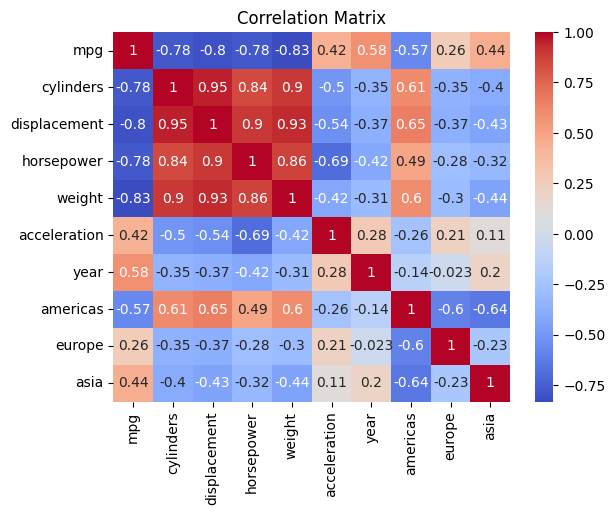

In [ ]:
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
missing_displacement = auto.loc[auto['horsepower'].isnull(), 'displacement']

In [ ]:
missing_displacement

name
ford pinto               98.0
ford maverick           200.0
renault lecar deluxe     85.0
ford mustang cobra      140.0
renault 18i             100.0
Name: displacement, dtype: float64

In [ ]:
missing_data = auto[auto['horsepower'].isnull()]

In [ ]:
missing_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,americas,europe,asia
name,,,,,,,,,,
ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1.0,0.0,0.0
ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1.0,0.0,0.0
renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,0.0,1.0,0.0
ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1.0,0.0,0.0
renault 18i,34.5,4,100.0,NaN,2320,15.8,81,0.0,1.0,0.0


In [ ]:
auto = auto.dropna()

In [ ]:
y= auto['horsepower']
x= auto['displacement']

In [ ]:
interp_func = interp1d(x, y, kind='linear', fill_value='extrapolate')

In [ ]:
interpolated_y = interp_func(missing_displacement)

In [ ]:
interpolated_y

array([80.        , 85.        , 52.        , 90.        , 78.66666667])

In [ ]:
missing_data['horsepower']= interpolated_y

<ipython-input-31-7fd6a356cb68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['horsepower']= interpolated_y


In [ ]:
missing_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,americas,europe,asia
name,,,,,,,,,,
ford pinto,25.0,4,98.0,80.000000,2046,19.0,71,1.0,0.0,0.0
ford maverick,21.0,6,200.0,85.000000,2875,17.0,74,1.0,0.0,0.0
renault lecar deluxe,40.9,4,85.0,52.000000,1835,17.3,80,0.0,1.0,0.0
ford mustang cobra,23.6,4,140.0,90.000000,2905,14.3,80,1.0,0.0,0.0
renault 18i,34.5,4,100.0,78.666667,2320,15.8,81,0.0,1.0,0.0


In [ ]:
auto = pd.concat([auto,missing_data])

In [ ]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
americas        0
europe          0
asia            0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

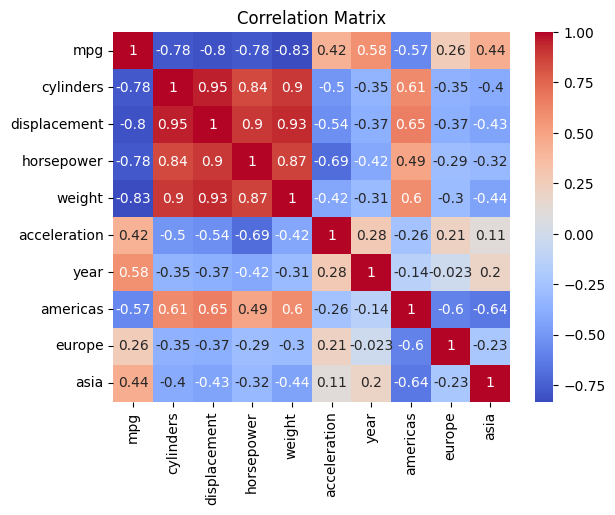

In [ ]:
correlation_matrix = auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'americas','europe','asia']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show

In [ ]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'americas', 'europe', 'asia'],
      dtype='object')

In [ ]:

from scipy.interpolate import interp1d

In [ ]:
# Finding the displacement of the cars
missing_displacement = auto.loc[auto['horsepower'].isnull(), 'displacement']

In [ ]:
missing_displacement

Series([], Name: displacement, dtype: float64)

In [ ]:
missing_data = auto[auto['horsepower'].isnull()]

In [ ]:
auto = auto.dropna()

In [ ]:
y = auto['horsepower']
x = auto['displacement']

In [ ]:
interp_func = interp1d(x, y, kind='linear', fill_value='extrapolate')

In [ ]:
interpolated_y = interp_func(missing_displacement)

In [ ]:
interpolated_y

array([], dtype=float64)

In [ ]:
missing_data['horsepower']=interpolated_y

In [ ]:
auto= pd.concat([auto,missing_data])

## What is a correlation matrix's role?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'americas', 'europe', 'asia'],
      dtype='object')

In [ ]:
correlation_matrix = auto.corr()

Text(0.5, 1.0, 'Auto Correlation')

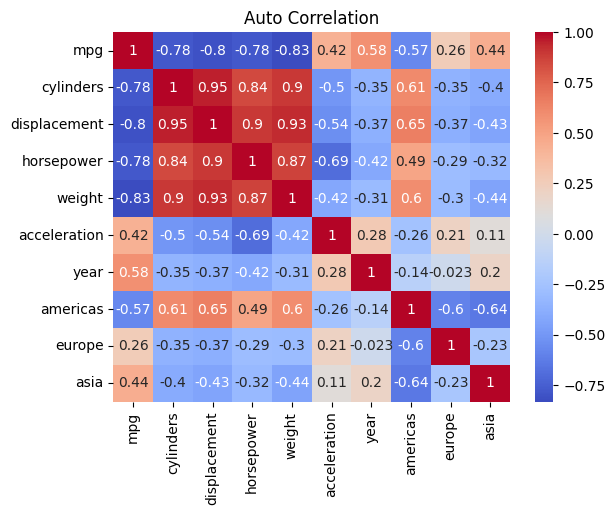

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm')
plt.title('Auto Correlation')
#plt.show

## Relationships

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

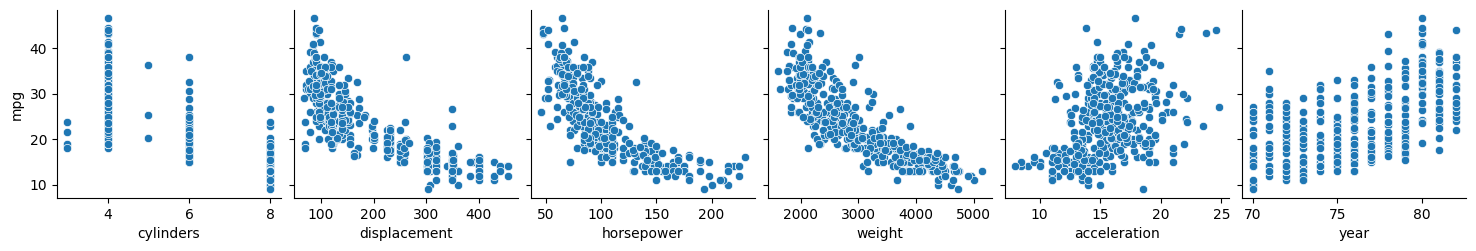

In [ ]:
sns.pairplot(auto, x_vars= ['cylinders','displacement', 'horsepower','weight', 'acceleration', 'year'], y_vars=['mpg'])

## Regression Analysis

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y= auto['mpg']
X= auto.drop('mpg', axis=1)

In [ ]:
X_train, X_test = train_test_split(X,test_size= 0.2, random_state =42 ) #seed
y_train, y_test = train_test_split(y, test_size= 0.2, random_state= 42) #seed

In [ ]:
print(len(y))
print(len(y_train)+len(y_test))

397
397


In [ ]:
from statsmodels.tools import add_constant

In [ ]:
X_train = add_constant(X_train)
X_test = add_constant(X_test)

In [ ]:
import statsmodels.api as sm

In [ ]:
linear_model = sm.OLS(y_train,X_train).fit()

In [ ]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     187.3
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          1.78e-113
Time:                        15:33:53   Log-Likelihood:                -819.94
No. Observations:                 317   AIC:                             1658.
Df Residuals:                     308   BIC:                             1692.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -10.9006      4.005     -2.722   

In [ ]:
linear_pred = linear_model.predict(X_test)

In [ ]:
linear_pred

name
chevrolet monte carlo s             14.166121
pontiac lemans v6                   23.202874
subaru dl                           31.799021
dodge colt hardtop                  23.855104
chevrolet chevelle concours (sw)    12.794495
                                      ...    
dodge aries se                      29.689544
plymouth champ                      32.504231
amc matador                         17.615892
amc rebel sst                       14.874115
datsun pl510                        24.984064
Length: 80, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse_linear = mean_squared_error(y_test, linear_pred, squared= False)

In [ ]:
rmse_linear

3.484507428476734

## Logarithmic Transformation

In [ ]:
auto_log = auto.copy()

In [ ]:
auto_log.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'americas', 'europe', 'asia'],
      dtype='object')

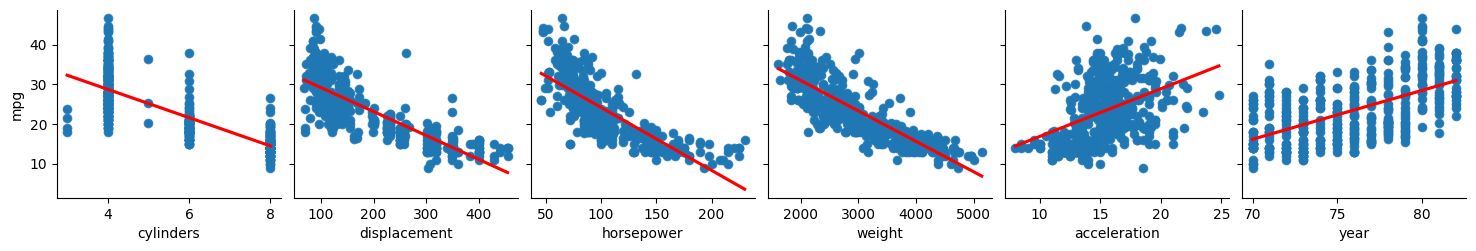

In [ ]:
sns.pairplot(auto, x_vars= ['cylinders','displacement', 'horsepower','weight', 'acceleration', 'year'], y_vars=['mpg'])
for ax in plt.gcf().axes:
    sns.regplot(data=auto, x=ax.get_xlabel(), y='mpg', ax=ax, ci=None, line_kws={'color': 'red'})

plt.show()

In [ ]:
import numpy as np

In [ ]:
auto_log[['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration']] = np.log(auto_log[['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration']])

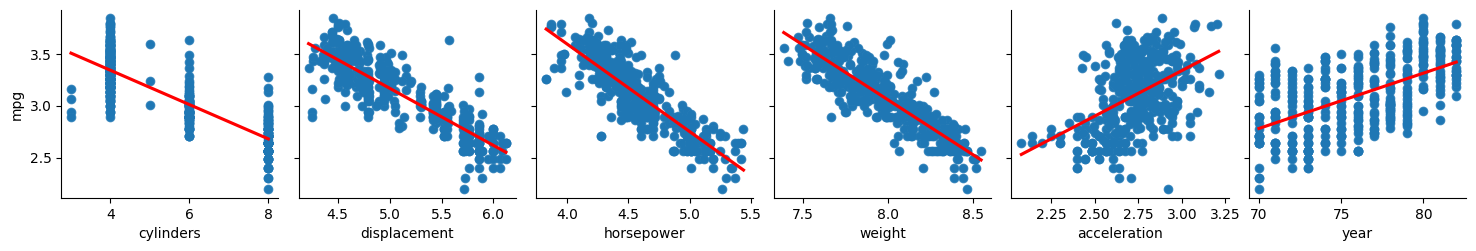

In [ ]:
sns.pairplot(auto_log,x_vars=['cylinders','displacement', 'horsepower','weight', 'acceleration', 'year'],y_vars=['mpg'])
for ax in plt.gcf().axes:
    sns.regplot(data=auto_log, x=ax.get_xlabel(), y='mpg', ax=ax, ci=None, line_kws={'color': 'red'})
plt.show()

In [ ]:
y = auto_log['mpg']

# Exclude 'mpg' column and get the rest as 'X'
X = auto_log.drop('mpg', axis=1)

In [ ]:
X_train_log, X_test_log = train_test_split(X, test_size=0.2, random_state=42)
y_train_log, y_test_log = train_test_split(y, test_size=0.2, random_state=42 )

In [ ]:
# Add a constant term to the dataset
X_train_log = add_constant(X_train_log)
X_test_log= add_constant(X_test_log)

In [ ]:
log_transformed_model = sm.OLS(y_train_log,X_train_log ).fit()

In [ ]:
print(log_transformed_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     324.3
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          4.26e-145
Time:                        15:33:59   Log-Likelihood:                 247.75
No. Observations:                 317   AIC:                            -477.5
Df Residuals:                     308   BIC:                            -443.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.4391      0.308     17.678   

In [ ]:
log_pred= log_transformed_model.predict(X_test_log)

In [ ]:
rmse_log = mean_squared_error(y_test_log, log_pred,squared= False)

In [ ]:
round(rmse_log,2)

0.11

## Polynomial

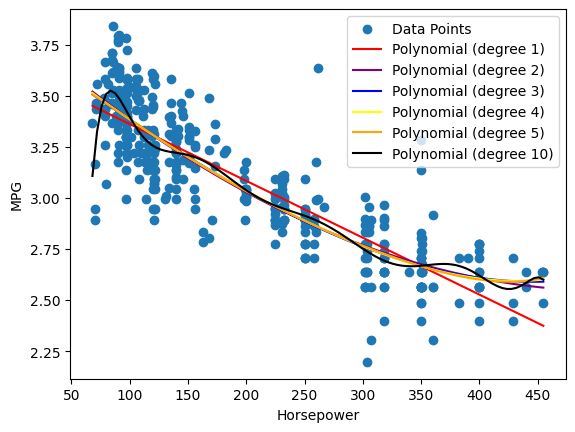

In [ ]:
plt.scatter(x, y, label='Data Points')

# Perform polynomial regression for degrees 1, 2, and 3
poly_degrees = [1, 2, 3, 4,  5, 10]
colors = ['red', 'purple', 'blue', 'yellow','orange', 'black']
for i, degree in enumerate(poly_degrees):
    coeffs = np.polyfit(x, y, degree)
    poly_line = np.poly1d(coeffs)
    x_range = np.linspace(x.min(), x.max(), 100)  # Range of x values for plotting
    plt.plot(x_range, poly_line(x_range), label=f'Polynomial (degree {degree})', color=colors[i])

# Add labels and legend
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degree= 2

In [ ]:
poly = PolynomialFeatures(degree,include_bias=False)

In [ ]:
X_poly_2 = poly.fit_transform(X)

In [ ]:
poly_model= poly.fit(X_poly_2,y_train)

In [ ]:
X_train_poly, X_test_poly = train_test_split(X_poly_2, test_size=0.2, random_state=42)

In [ ]:
poly_model_2 = sm.OLS(y_train,X_train_poly ).fit()

In [ ]:
poly_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     63.01
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          8.16e-117
Time:                        15:34:00   Log-Likelihood:                -729.24
No. Observations:                 317   AIC:                             1542.
Df Residuals:                     275   BIC:                             1700.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -29.6288     17.600     -1.683      0.093     -64.276       5.018
x2           -84.2354     75.147     -1.121      0.263    -232.172      63.702
x3           114.0676     69.746      1.635      0.103     -23.237     251.372
x4            62.4119    125.505      0.497      0.619    -184.660     309.484
x5            39.7709     78.582      0.506      0.613    -114.927     194.469
x6            -6.7066      3.319     -2.021      0.044     -13.241      -0.173
x7            44.3062    291.833      0.152      0.879    -530.205     618.817
x8            -5.6636    288.315     -0.020      0.984    -573.249     561.922
x9             9.9641    283.311      0.035      0.972    -547.770     567.698
x10            0.0527      0.546      0.097      0.923      -1.023       1.128
x11           -2.9043      4.722     -0.615      0.539     -12.201       6.392
x12            1.8078      3.204      0.564      0.573      -4.501       8.116
x13            3.4875      4.461      0.782      0.435      -5.295      12.270
x14            5.5465      2.998      1.850      0.065      -0.355      11.448
x15            0.0283      0.103      0.274      0.784      -0.175       0.232
x16           -9.4212      5.929     -1.589      0.113     -21.093       2.250
x17          -11.4859      6.081     -1.889      0.060     -23.456       0.485
x18           -8.7217      5.736     -1.521      0.130     -20.013       2.570
x19            1.0027     12.905      0.078      0.938     -24.402      26.408
x20           -6.0364     13.569     -0.445      0.657     -32.748      20.676
x21           20.6927     21.799      0.949      0.343     -22.222      63.608
x22           -7.4334     15.736     -0.472      0.637     -38.411      23.544
x23           -0.0175      0.519     -0.034      0.973      -1.040       1.005
x24          -27.3960     25.457     -1.076      0.283     -77.512      22.720
x25          -32.8851     24.626     -1.335      0.183     -81.365      15.595
x26          -23.9544     26.244     -0.913      0.362     -75.619      27.710
x27           -5.0206     10.912     -0.460      0.646     -26.502      16.460
x28            1.4867     24.111      0.062      0.951     -45.979      48.952
x29          -18.0239     18.800     -0.959      0.339     -55.035      18.987
x30           -0.7081      0.532     -1.330      0.185      -1.756       0.340
x31           39.7383     24.500      1.622      0.106      -8.492      87.969
x32           35.4055     23.599      1.500      0.135     -11.053      81.864
x33           38.9237     22.493      1.730      0.085      -5.357      83.205
x34          -17.4403     17.915     -0.973      0.331     -52.708      17.828
x35            4.7242     27.247      0.173      0.862     -48.916      58.364
x36            0.5348      0.824      0.649      0.517      -1.087       2.156
x3

In [ ]:
poly_pred_2 = poly_model_2.predict(X_test_poly)

In [ ]:
rmse_poly_2 = mean_squared_error(y_test, poly_pred_2,squared= False)

In [ ]:
round(rmse_poly_2,2)

2.61

In [ ]:
rmse_linear

3.484507428476734

## Summary

In [ ]:
rmse_list = [round(rmse_linear,2),round(rmse_log,2),round(rmse_poly_2,2)]

In [ ]:
rmse_list

[3.48, 0.11, 2.61]

In [ ]:
rmse_names =['linear','logarithmic','polynomial']

In [ ]:
rmse_df = pd.DataFrame({'rmse':rmse_names,'values':rmse_list})

In [ ]:
rmse_df

,rmse,values
0,linear,3.48
1,logarithmic,0.11
2,polynomial,2.75
